In [1]:
import numpy as np
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from matplotlib import rc
rc('animation', html='jshtml')

from scipy.signal import correlate2d
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import thinkplot
from thinkstats2 import Pmf, Cdf
from thinkstats2 import RandomSeed

from Cell2D import Cell2D, Cell2DViewer
from Sand import SandPile, SandPileViewer

In [15]:
class SPile(Cell2D):
    kernal = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    k = 3
    toppled_seq = []
    
    def __init__(self, n=3, m=None, level=3):
        m = n if m==None else m
        self.n = n
        self.m = m
        
        self.array = np.ones((n, m), dtype=np.int32) * level
        self.level = level
    
    def step(self):
        toppling = self.array > self.k
        num_toppled = np.sum(toppling)
        
        c = correlate2d(toppling, self.kernal, mode='same')
        self.array += c

class SPileViewer(Cell2DViewer):
    vmax = 3
    options = dict(alpha=0.6, interpolation='nearest', vmin=0, vmax=vmax)
    colors = [(0, 'white'), (1/vmax, 'Yellow'), (2/vmax, 'Blue'), (3/vmax, 'Red')]
    cmap = LinearSegmentedColormap.from_list('mycmap', colors)

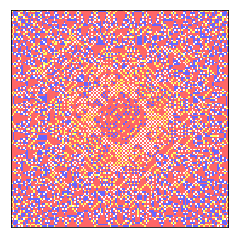

In [16]:
n=128
spile = SPile(n=n, level=10)
spile.array[n//2, n//2] = 2**30
for i in range(1, 10000):
    spile.step()
viewer = SPileViewer(spile)
anim = viewer.animate(frames=1000, interval=5)